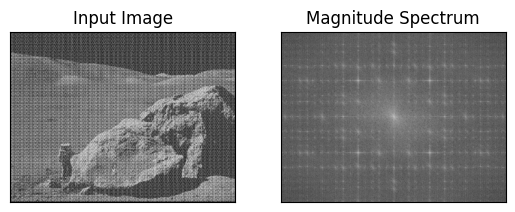

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

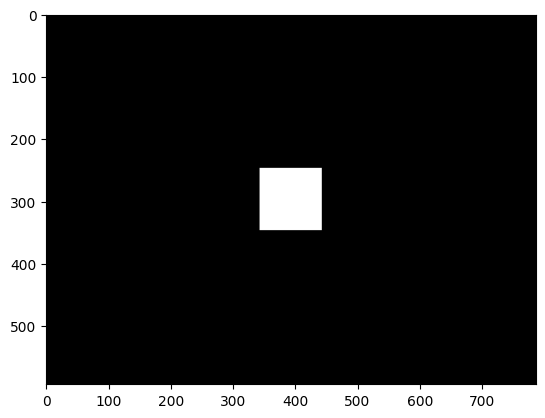

In [13]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [14]:
# Filtering
dft_shift = dft_shift*mask

C:\Users\User\AppData\Local\Temp\ipykernel_9108\3830399572.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


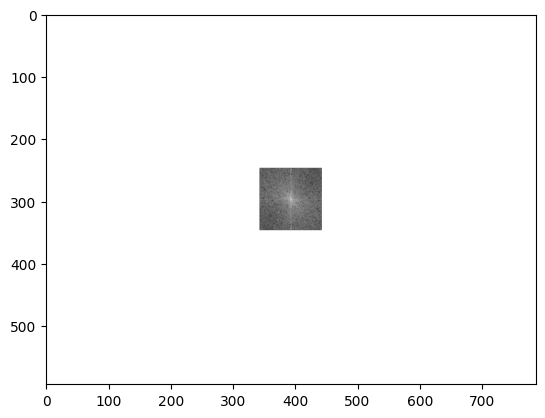

In [15]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [16]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

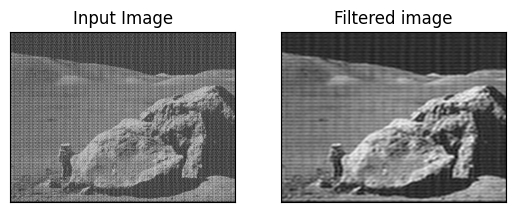

In [17]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

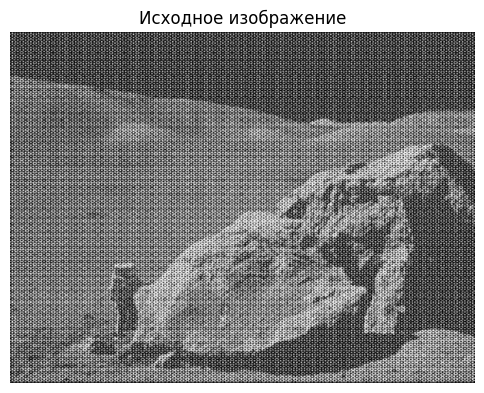

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("periodic_noise.JPG", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.title("Исходное изображение")
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

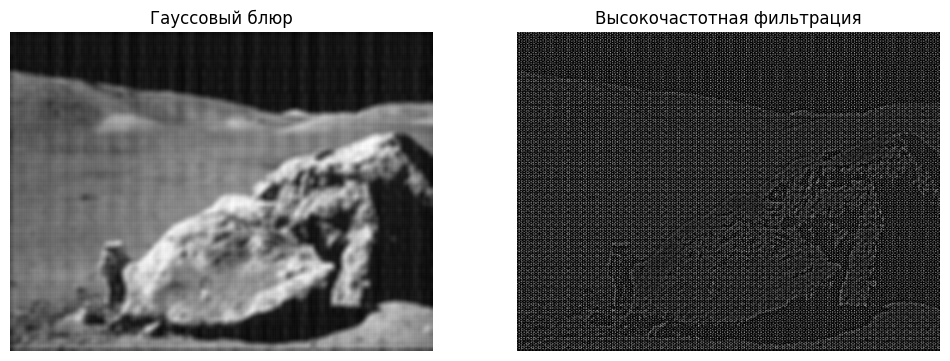

In [20]:
blurred = cv2.GaussianBlur(img, (15, 15), 5)

high_pass = cv2.subtract(img, blurred)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Гауссовый блюр")
plt.imshow(blurred, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Высокочастотная фильтрация")
plt.imshow(high_pass, cmap="gray")
plt.axis("off")
plt.show()

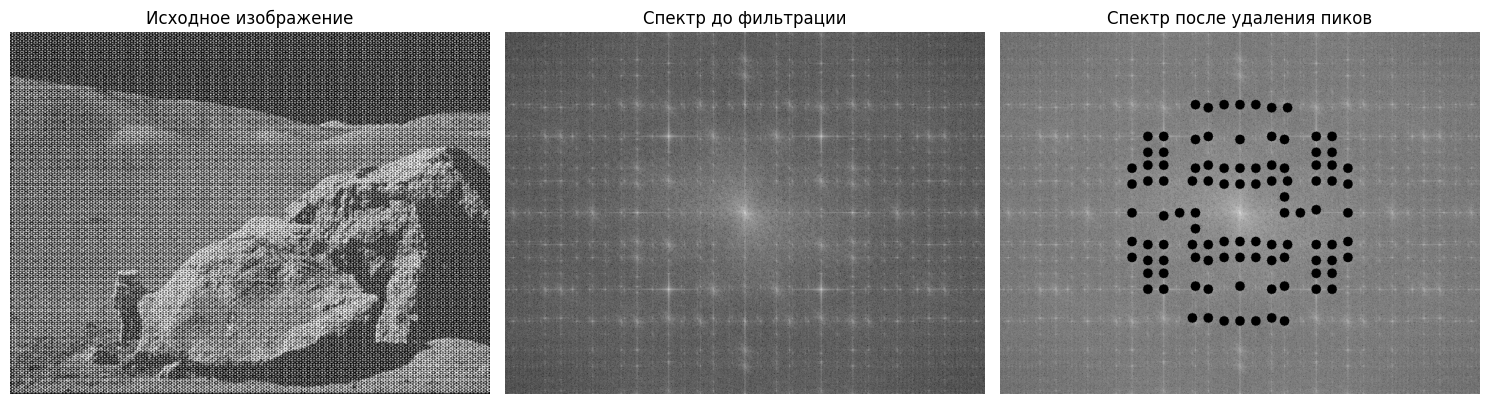

In [27]:
from skimage.feature import peak_local_max

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(fshift))

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

peaks = peak_local_max(magnitude_spectrum, min_distance=20, threshold_abs=6)

mask = np.ones((rows, cols), dtype=np.uint8)

for (y, x) in peaks:
    dist = np.sqrt((y - crow)**2 + (x - ccol)**2)
    if 40 < dist < 200:  
        cv2.circle(mask, (x, y), 8, 0, -1)

fshift_filtered = fshift * mask

f_ishift = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Спектр до фильтрации")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.log(1 + np.abs(fshift_filtered)), cmap='gray')
plt.title("Спектр после удаления пиков")
plt.axis('off')

plt.tight_layout()
plt.show()

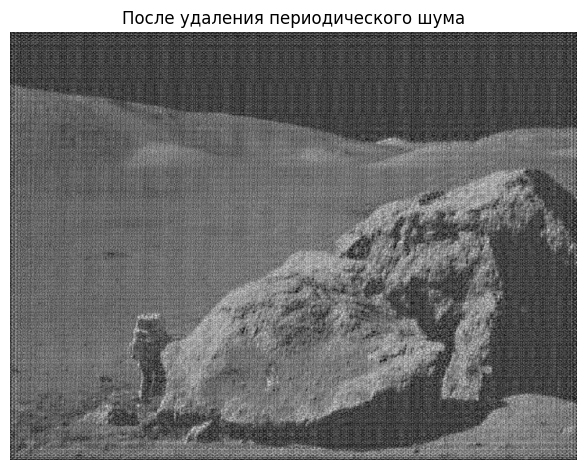

In [28]:
plt.imshow(img_filtered, cmap='gray')
plt.title("После удаления периодического шума")
plt.axis('off')
plt.tight_layout()
plt.show()